Prediction, Meta Prophet and NeuralProphet (DL-type prophet)
---
Got the data, got the world. But how to get the world?
```
Future Forecast!
```
FaceBook releaed the powerful package, Prophet, to do  forecast of time-series data by its own and without no pain suffereing.

Here the DL-revised prophet, NeuralProphet, is also introduced to compare with Prophet. 

Memory_or_not
---
[Multi-Prophet](https://github.com/vonum/multi-prophet)

In [1]:
!pip install prophet neuralprophet 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 98 kB 3.5 MB/s 
     |████████████████████████████████| 1.6 MB 29.9 MB/s 


In [2]:
import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt

from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly, plot_cross_validation_metric
from prophet.diagnostics import performance_metrics, cross_validation

from neuralprophet import NeuralProphet, set_log_level

In [ ]:
!pip install multi-prophet --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [5]:

%matplotlib inline
#畫圖用的
import datetime as dt
#把文字轉成時間用的
import yfinance as yf
#本次核心，下載資料用的

import seaborn as sns
import plotly.express as px
# pkg for interactive vis

import warnings
warnings.filterwarnings('ignore')
#把warning省略掉

In [6]:
# S, Walmark for demo
tick='WMT'
start = dt.datetime(2016, 7, 1)
end = dt.datetime.today()
df_ = yf.download([tick], start, end)

df=pd.DataFrame(columns=['ds','y'])
    
df['ds']=list(pd.to_datetime(df_.index).strftime('%Y-%m-%d'))
df['y']=df_['Close'].values


[*********************100%***********************]  1 of 1 completed


In [ ]:
df_.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-07-01 00:00:00-04:00,73.129997,73.169998,72.419998,72.809998,64.116486,7638800
2016-07-05 00:00:00-04:00,72.750000,73.620003,72.680000,73.139999,64.407089,10748600
2016-07-06 00:00:00-04:00,73.260002,73.980003,73.169998,73.820000,65.005898,11062700
2016-07-07 00:00:00-04:00,73.730003,73.930000,73.150002,73.529999,64.750519,7792800
2016-07-08 00:00:00-04:00,73.820000,73.849998,73.239998,73.839996,65.023506,9127600


In [ ]:
df.head()

,ds,y
0,2016-07-01,72.809998
1,2016-07-05,73.139999
2,2016-07-06,73.820000
3,2016-07-07,73.529999
4,2016-07-08,73.839996


Prophet Model
---
$$y(t)=g(t)+s(t)+h(t)+\varepsilon(t)$$
where 
- $g(t)$ is the trend, the major composent in  Prophet model, which uses a piecewise linear model for trend forecasting.
- $s(t)$ represents periodic changes (weekly, monthly, yearly).
- $h(t)$ represents the effects of holidays (recall: Holidays impact businesses).
- $\varepsilon(t)$ is the error term.


In [7]:
# Simple Prophet model
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbb8hidsq/zbcsy_2q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbb8hidsq/h8uncn3q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51895', 'data', 'file=/tmp/tmpbb8hidsq/zbcsy_2q.json', 'init=/tmp/tmpbb8hidsq/h8uncn3q.json', 'output', 'file=/tmp/tmpbb8hidsq/prophet_model9dmuyzep/prophet_model-20221019040003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:00:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:00:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [8]:
# make forecast
future = m.make_future_dataframe(periods=120)
forecast = m.predict(future)

In [9]:
# create plots
plot_plotly(m, forecast)


In [10]:
plot_components_plotly(m, forecast)

In [11]:
m1=Prophet()

In [12]:
df=pd.DataFrame()
df['High']=df_['High'].values
df['Low']=df_['Low'].values
df['y']=df_['Close'].values
df['ds'] = list(pd.to_datetime(df_.index).strftime('%Y-%m-%d'))


In [13]:
m1.add_regressor('High',standardize=False)
m1.add_regressor('Low',standardize=False)
#m1.add_regressor('Close',standardize=False)

In [14]:
df.head()

,High,Low,y,ds
0,73.169998,72.419998,72.809998,2016-07-01
1,73.620003,72.680000,73.139999,2016-07-05
2,73.980003,73.169998,73.820000,2016-07-06
3,73.930000,73.150002,73.529999,2016-07-07
4,73.849998,73.239998,73.839996,2016-07-08


In [15]:
m1.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbb8hidsq/5__jkxdr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbb8hidsq/oin9zxhw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73426', 'data', 'file=/tmp/tmpbb8hidsq/5__jkxdr.json', 'init=/tmp/tmpbb8hidsq/oin9zxhw.json', 'output', 'file=/tmp/tmpbb8hidsq/prophet_model4ix3zwq5/prophet_model-20221019040205.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:02:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:02:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [16]:
m1.params

OrderedDict([('lp__', array([[7717.06]])),
             ('k', array([[0.22291]])),
             ('m', array([[0.0734641]])),
             ('delta',
              array([[-0.161071  , -0.0871396 , -0.0201644 ,  0.0156433 ,  0.0280363 ,
                       0.020762  ,  0.00252049, -0.00556875, -0.00939784, -0.00448182,
                      -0.00331334, -0.00127809, -0.00076057,  0.00149808,  0.0061959 ,
                       0.00740539,  0.00350074, -0.00207433, -0.00355548, -0.00256562,
                      -0.00259886, -0.00378625,  0.00023235, -0.00185575, -0.00409808]])),
             ('sigma_obs', array([[0.00540111]])),
             ('beta',
              array([[-2.85612e-06, -3.02562e-04,  1.73126e-04,  1.75109e-04,
                      -4.15882e-04, -1.58134e-04,  3.12594e-04,  2.55633e-04,
                       2.05485e-04,  3.89368e-05, -2.59983e-05, -4.12757e-05,
                      -2.01631e-04,  1.15656e-04,  2.09297e-04, -1.55176e-04,
                       8.906

In [17]:
#future1 = m1.make_future_dataframe(periods=365)#
df2=df[['ds','High','Low']].copy()
forecast1 = m1.predict(df2)

In [ ]:
plot_plotly(m1, forecast1)

In [ ]:
plot_components_plotly(m1, forecast)

In [18]:
##########################
# Data + helpers
###########################
def pd_index_to_YYYY_MM_DD(df):
    df.index = pd.to_datetime(df.index).strftime('%Y-%m-%d')
    return df

def get_data(tick):
    start = dt.datetime(2016, 7, 1)
    end = dt.datetime.today()
    df_=yf.download([tick], start, end)['Adj Close']
    df1=pd.DataFrame(columns=['ds','y'])
    
    df_.index = pd.to_datetime(df_.index).strftime('%Y-%m-%d')

    df1['ds']=list(df_.index)
    df1['y']=df_.values
    return df1


In [19]:
tick="2330.TW"

df=get_data(tick)

[*********************100%***********************]  1 of 1 completed


In [20]:
def plot_data(tick):
    """
    Read data and plot. 

    """

    df = get_data(tick)
    fig = px.scatter(df, x='ds', y='y', template='simple_white', title=' %s Stock Price' %tick)
    fig.show()

In [21]:
plot_data(tick)

[*********************100%***********************]  1 of 1 completed


In [22]:
# base code from docs on Prophet
def fit_prophet(df):
    """
    Fit Prophet model and return 
    Source: https://facebook.github.io/prophet/docs/quick_start.html#python-api
    """

    # fit model
    m = Prophet()
    m.fit(df)

    # create forecast
    future = m.make_future_dataframe(periods=365)
    forecast = m.predict(future)

    # create plots
    pred_plot = plot_plotly(m, forecast)
    comp_plot = plot_components_plotly(m, forecast)

    return m, forecast, pred_plot, comp_plot

In [23]:
m, forecast, pred_plot, comp_plot = fit_prophet(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbb8hidsq/louymizm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbb8hidsq/e20o10s8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34994', 'data', 'file=/tmp/tmpbb8hidsq/louymizm.json', 'init=/tmp/tmpbb8hidsq/e20o10s8.json', 'output', 'file=/tmp/tmpbb8hidsq/prophet_models7ci2b4b/prophet_model-20221019040327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:03:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:03:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [24]:
pred_plot

In [ ]:
comp_plot

Observations
---
- Trend: pretty unstable, it inceased fast starting from  the first quarter of  2020 and decreased slowly since mid of 2021.
- Second, the price is all-time high at the Spring and all-time low at July.
- Third, deal price is on the weekends is significantly lower than on the week days.



Homework
---
1. practice this sheet by yourself.
2. Try to test this procedure for different companies, transportation, bank, medical for instance.

NeuraProphet
---
NeuralProphet is the variant DL version of Prophet and allows users to use simple but powerful deep learning models such as AR-Net for forecasting tasks.

In [ ]:
from neuralprophet import NeuralProphet

In [ ]:
m_DL = NeuralProphet(
    n_forecasts=60,
    n_lags=60,
    n_changepoints=50,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    batch_size=64,
    epochs=100,
    learning_rate=1.0,
)

metrics = m_DL.fit(df, freq="D")

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.338% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.338% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.forecaster.__handle_missing_data) - 713 missing dates added.
INFO:NP.forecaster:713 missing dates added.
WARNING - (NP.forecaster.__handle_missing_data) - 713 missing values in column y were detected in total. 
INFO - (NP.forecaster.__handle_missing_data) - 713 NaN values in column y were auto-imputed.
INFO:NP.forecaster:713 NaN values in column y were auto-imputed.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
Epoch[100/100]: 100%|██████████| 100/100 [00:14<00:00,  7.01it/s, SmoothL1Loss=0.00104, MAE

In [ ]:
# Predictions
future = m_DL.make_future_dataframe(df, periods=120, \
                                    n_historic_predictions=len(df)) 
#we need to specify the number of days in future
prediction = m_DL.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.338% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.338% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
WARNING - (NP.forecaster._make_future_dataframe) - Insufficient data for 1584 historic forecasts, reduced to 1524.
WARNING - (NP.forecaster._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to {self.n_forecasts}.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.472% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.472% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equa

WARNING - (NP.plotting.plot) - Legend is available only for the ten first handles


Text(60.0, 0.5, 'Close Stock Price')

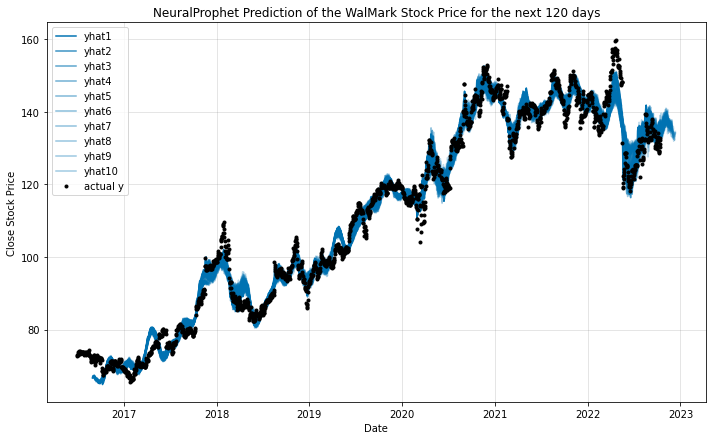

In [ ]:
# Plotting
forecast = m_DL.plot(prediction)
plt.title("NeuralProphet Prediction of the WalMark Stock Price for the next 120 days")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")

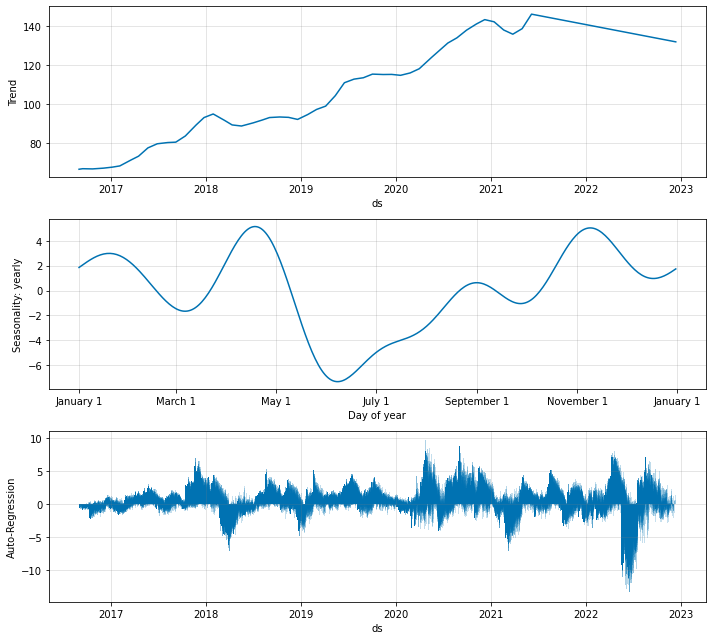

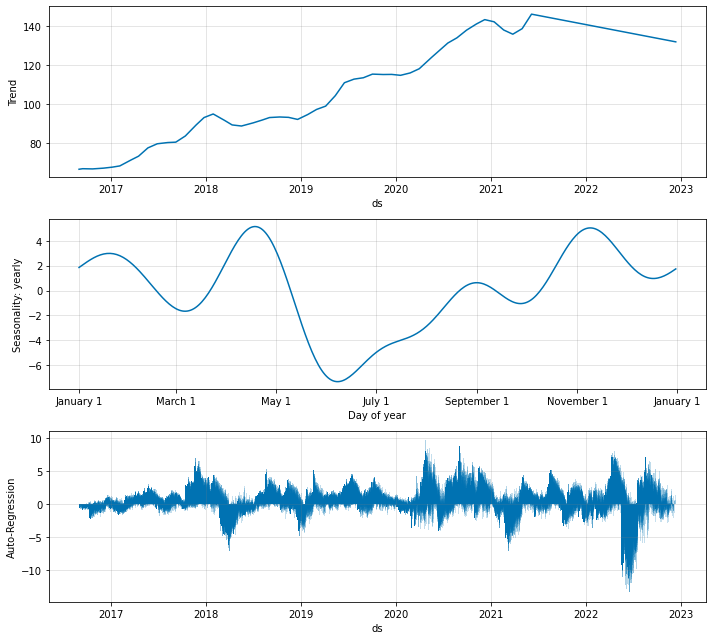

In [ ]:
m_DL.plot_components(prediction)

In [ ]:
def fit_neural(df, params=None):
    """
    FIt NeuralProphet and return key objects.
    """

    # fit 
    if (params==None):
       m = NeuralProphet(
                          n_forecasts=60,n_lags=60,n_changepoints=50,
                          yearly_seasonality=True,weekly_seasonality=False,
                          daily_seasonality=False,
                          batch_size=64,epochs=100,learning_rate=1.0,)
     else:
      m = NeuralProphet(**params) if params is not None else NeuralProphet()
    metrics = m.fit(df, freq="D")

    df_future = m.make_future_dataframe(df, periods=365)
    forecast = m.predict(df_future, raw=True, decompose=False) if params is not None else m.predict(df_future)

    if params is None:
        fig_forecast = m.plot(forecast)
        fig_components = m.plot_components(forecast)
        fig_params = m.plot_parameters()

        return m, forecast, fig_forecast, fig_components, fig_params

    else:
        return None, forecast, None, None


INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.482% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.482% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 170
INFO:NP.config:Auto-set epochs to 170


  0%|          | 0/130 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.17E-01, min: 2.49E+00
INFO:NP.utils_torch:lr-range-test results: steep: 1.17E-01, min: 2.49E+00


  0%|          | 0/130 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.38E-01, min: 3.43E+00
INFO:NP.utils_torch:lr-range-test results: steep: 1.38E-01, min: 3.43E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.17E-01
INFO:NP.forecaster:lr-range-test selected learning rate: 1.17E-01
Epoch[170/170]: 100%|██████████| 170/170 [00:13<00:00, 12.18it/s, SmoothL1Loss=0.000781, MAE=13.9, RMSE=18, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.482% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.482% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to

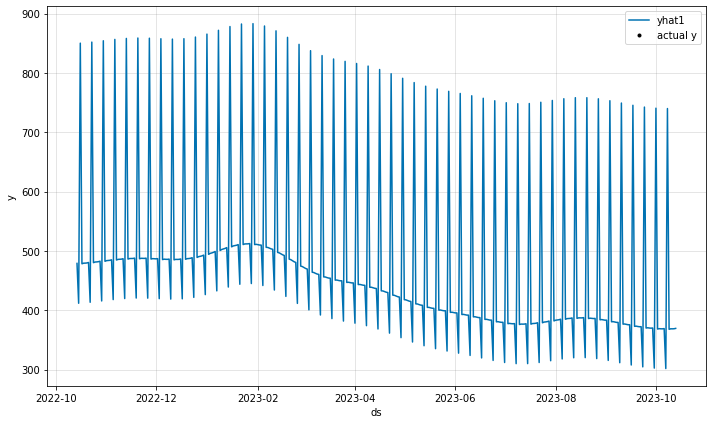

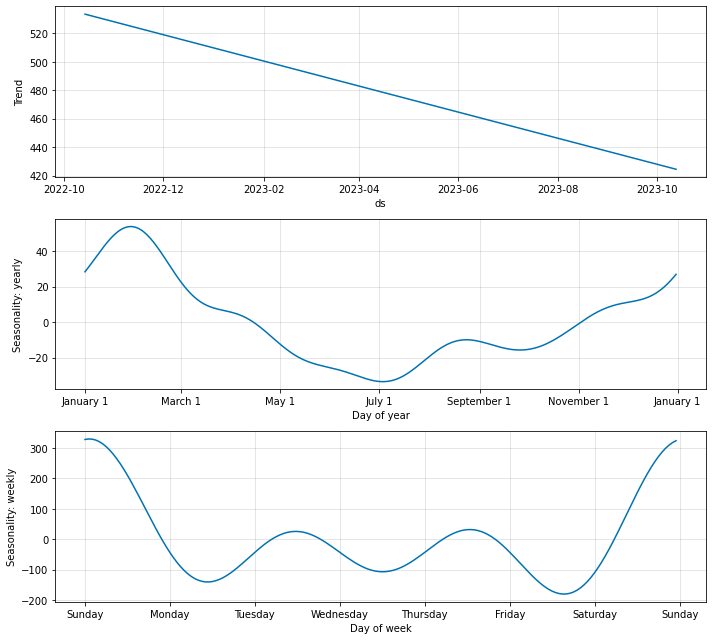

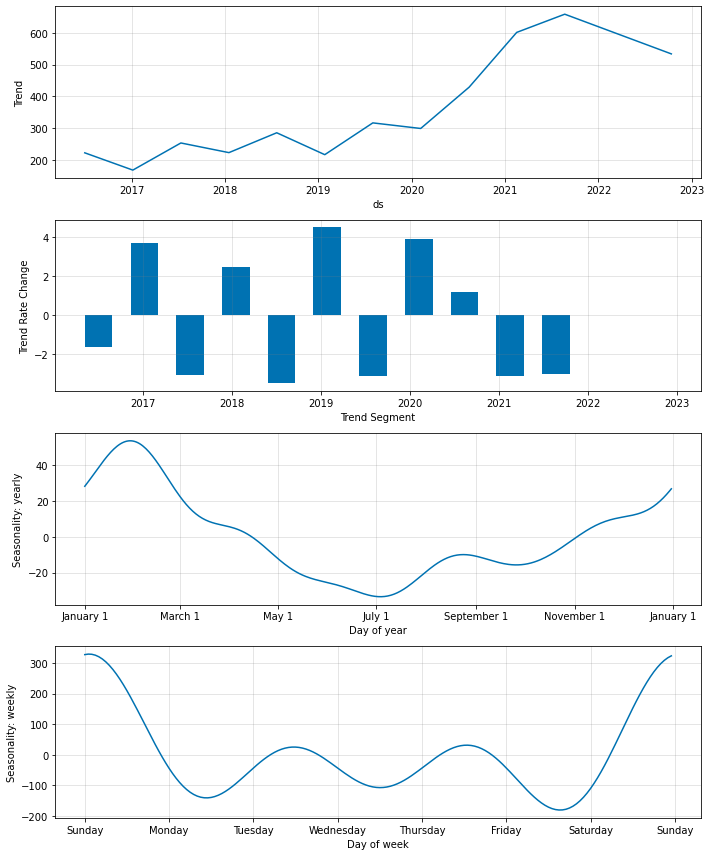

In [ ]:
m2, forecast2, forecast_plot2, component_plot2, params_plot2 = fit_neural(df)

plt.show()

In [ ]:
# set model parameters to use AR-Net

neural_params =  dict(
    n_forecasts=365,
    n_lags=30,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    batch_size=64,
    epochs=200,
    learning_rate=0.03
)

forecast3 = fit_neural(df,params=neural_params)



INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.482% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.482% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.forecaster.__handle_missing_data) - 761 missing dates added.
INFO:NP.forecaster:761 missing dates added.
INFO - (NP.forecaster.__handle_missing_data) - 761 NaN values in column y were auto-imputed.
INFO:NP.forecaster:761 NaN values in column y were auto-imputed.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
Epoch[200/200]: 100%|██████████| 200/200 [00:47<00:00,  4.20it/s, SmoothL1Loss=0.000701, MAE=13.3, RMSE=17.3, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.

In [ ]:
forecast3

(None,
            ds       step0       step1       step2       step3       step4  \
 0  2022-09-30  486.277100  496.606781  491.842224  486.431213  483.321533   
 1  2022-10-01  485.495758  482.348938  489.262115  492.191376  479.994995   
 2  2022-10-02  470.392792  480.358521  483.136993  483.858765  481.407623   
 3  2022-10-03  484.113098  481.670227  481.239227  484.162933  492.227356   
 4  2022-10-04  488.604584  478.347839  478.870056  487.104584  492.884247   
 5  2022-10-05  490.993713  491.370697  493.540802  482.985840  496.566223   
 6  2022-10-06  498.174072  495.744873  502.868073  491.198090  498.815216   
 7  2022-10-07  499.453308  511.673645  500.915009  498.149567  498.134857   
 8  2022-10-08  504.321381  497.696716  498.000122  506.146027  490.248993   
 9  2022-10-09  486.353394  487.679108  494.155762  501.197021  481.074829   
 10 2022-10-10  486.638794  483.112213  488.880280  491.192200  486.892578   
 11 2022-10-11  478.593994  487.616516  480.428101  489.2

In [ ]:
# dataframe needs to have column ds, and it has y1 and y2 as dependent variables
from multi_prophet import MultiProphet

m = MultiProphet(columns=["y1", "y2"])
m.fit(df)

future = m.create_future_dataframe(df)
forecast = m.predict(future)
m.plot(forecast)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 48 kB/s 
     |████████████████████████████████| 199 kB 44.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=7122c14bcc69ea7e139200f99b31861597c42057fd4c6308c15e079c46f204c3
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


,High,Low,y,ds
0,73.169998,72.419998,72.809998,2016-07-01
1,73.620003,72.680000,73.139999,2016-07-05
2,73.980003,73.169998,73.820000,2016-07-06
3,73.930000,73.150002,73.529999,2016-07-07
4,73.849998,73.239998,73.839996,2016-07-08
...,...,...,...,...
1579,129.929993,128.279999,129.320007,2022-10-10
1580,133.800003,129.460007,132.669998,2022-10-11
1581,134.770004,130.970001,131.169998,2022-10-12
1582,132.940002,128.369995,132.279999,2022-10-13
